# **Table of Contents**

[Importing Dataset and Libraries](#Importing-Dataset-and-Libraries)

[Data Visualization](#Data-Visualization)

[Exploratory Data Analysis](#Exploratory-Data-Analysis)
>[K Means Clustering](#K-Means-Clustering)<br>
>[Hierarchial Clustering](#Hierarchial-Clustering)
    
[Classification Algorithms](#Classification-Algorithms)
>[Decision Tree](#Decision-Tree)<br>
>[Random Forest Classifier](#Random-Forest-Classifier)<br>
>[KNN: K-Nearest Neighbors Classification](#KNN:-K-Nearest-Neighbors-Classification)<br>
>[Support Vector Classifier](#Support-Vector-Classifier)<br>
>[Best Support Vector Classification Parameters](#Best-Support-Vector-Classification-Parameters)<br>
>[Logistic regression](#Logistic-regression)<br>
>[Naive Bayes: Gaussian Model](#Naive-Bayes:-Gaussian-Model)
    
[Regression](#Regression)
>[Linear Regression](#Linear-Regression)<br>
>[Support Vector Regression](#Support-Vector-Regression)<br>
>[Best Support Vector Regression Parameters](#Best-Support-Vector-Regression-Parameters)<br>
>[KNN: K-Nearest Neighbors Regression](#KNN:-K-Nearest-Neighbors-Regression)

[Recursive feature elimination with cross-validation.](#Recursive-feature-elimination-with-cross-validation.)
>[Optimal Feature Selection](#Optimal-Feature-Selection)<br>
>[Applying PCA on the optimal features](#Applying-PCA-on-the-optimal-features)<br>
>[Classification Algorithms Comparision on Orginal and Reduced data](#Classification-Algorithms-Comparision-on-Orginal-and-Reduced-data)<br>
>[Regression Algorithms Comparision on Orginal and Reduced data](#Regression-Algorithms-Comparision-on-Orginal-and-Reduced-data)

[Conclusion](#Conclusion)
>[Findings for classification algorithms and regression (Before PCA)](#Findings-for-classification-algorithms-and-regression-(Before-PCA))<br>
>[Findings for classification algorithms and regression (After PCA)](#Findings-for-classification-algorithms-and-regression-(After-PCA))<br>
>[Comparing the Models: Which is Better?](#Comparing-the-Models:-Which-is-Better?)<br>
>[Key Takeways from this Project](#Key-Takeways-from-this-Project)<br>

[References](#References)

# **Importing Dataset and Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score, KFold

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()  # Check for missing values in the entire DataFrame

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.duplicated().sum()  # Check for duplicated values in the entire DataFramed

1

In [8]:
df.shape

(303, 14)

# **Data Visualization**

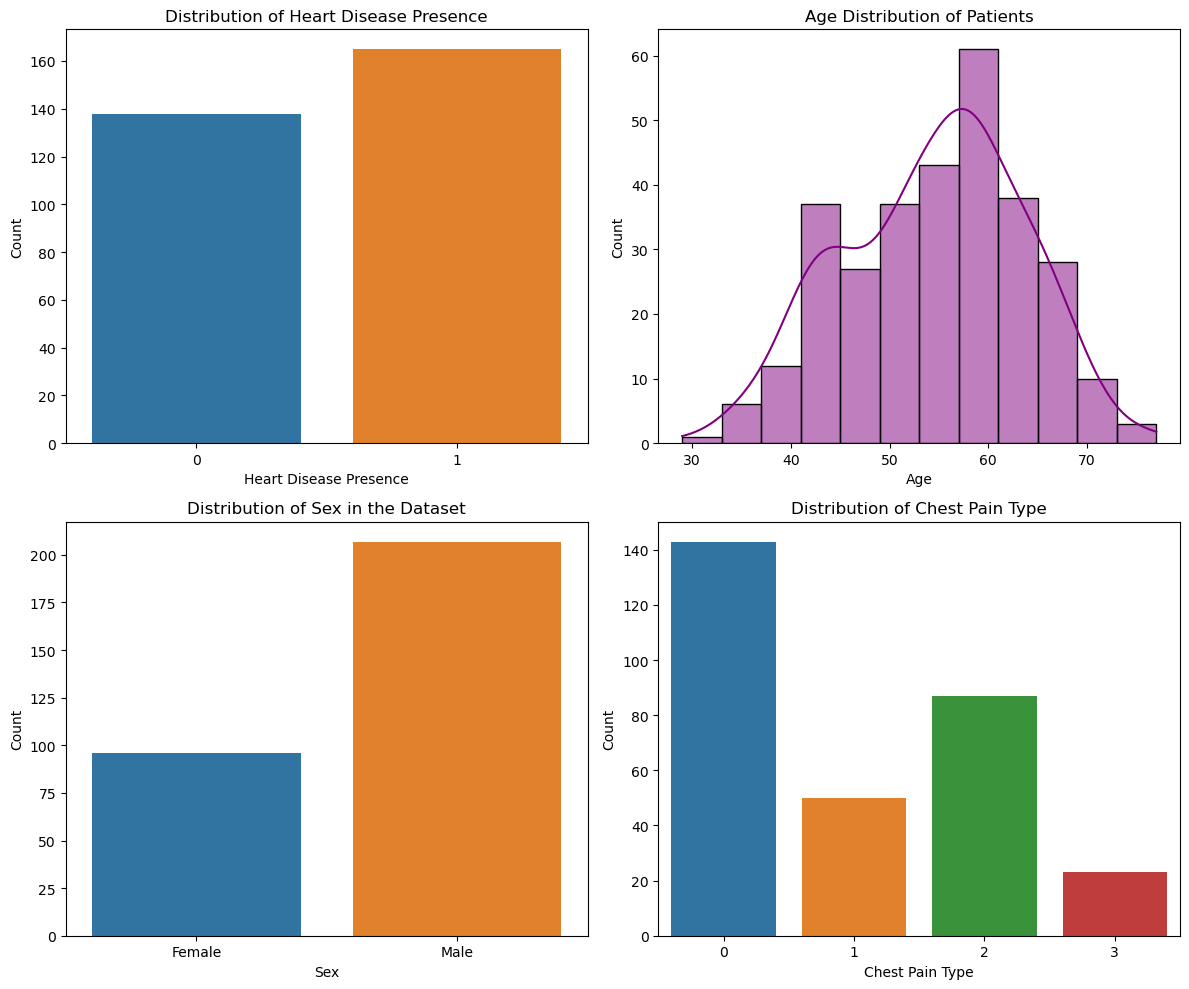

In [9]:
df.rename(columns={'target': 'output'}, inplace=True)

# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plotting the distribution of the output variable (heart disease presence)
sns.countplot(x='output', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel('Heart Disease Presence')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Heart Disease Presence')

# Plotting the age distribution of patients
sns.histplot(df['age'], kde=True, color='purple', ax=axes[0, 1])
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Age Distribution of Patients')

# Plotting the distribution of sex (male or female) in the dataset
sns.countplot(x='sex', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Sex in the Dataset')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Female', 'Male'])

# Plotting the chest pain type distribution
sns.countplot(x='cp', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Chest Pain Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of Chest Pain Type')

plt.tight_layout()
plt.show()

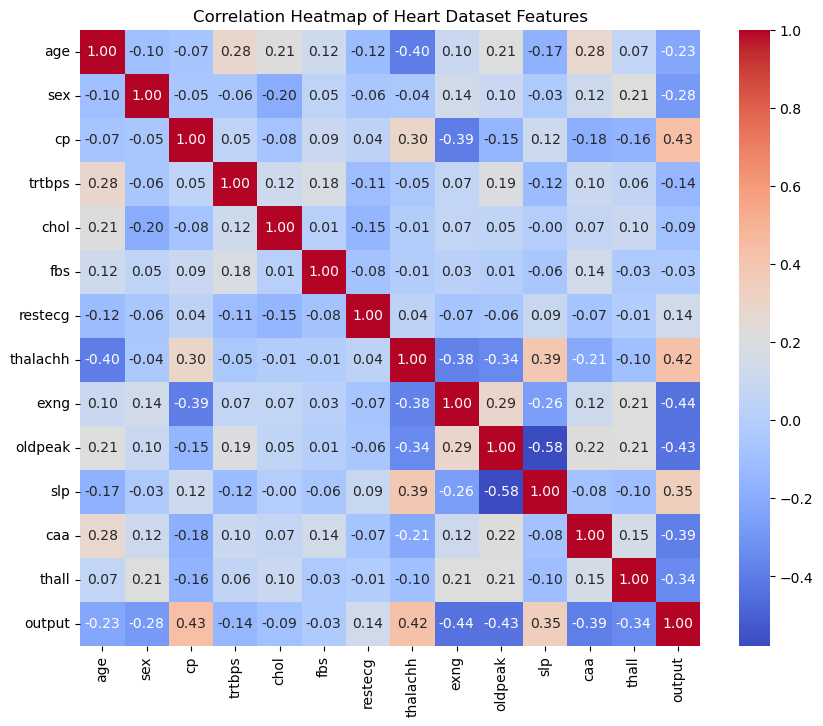

In [10]:
# Creating the heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Heart Dataset Features')
plt.show()


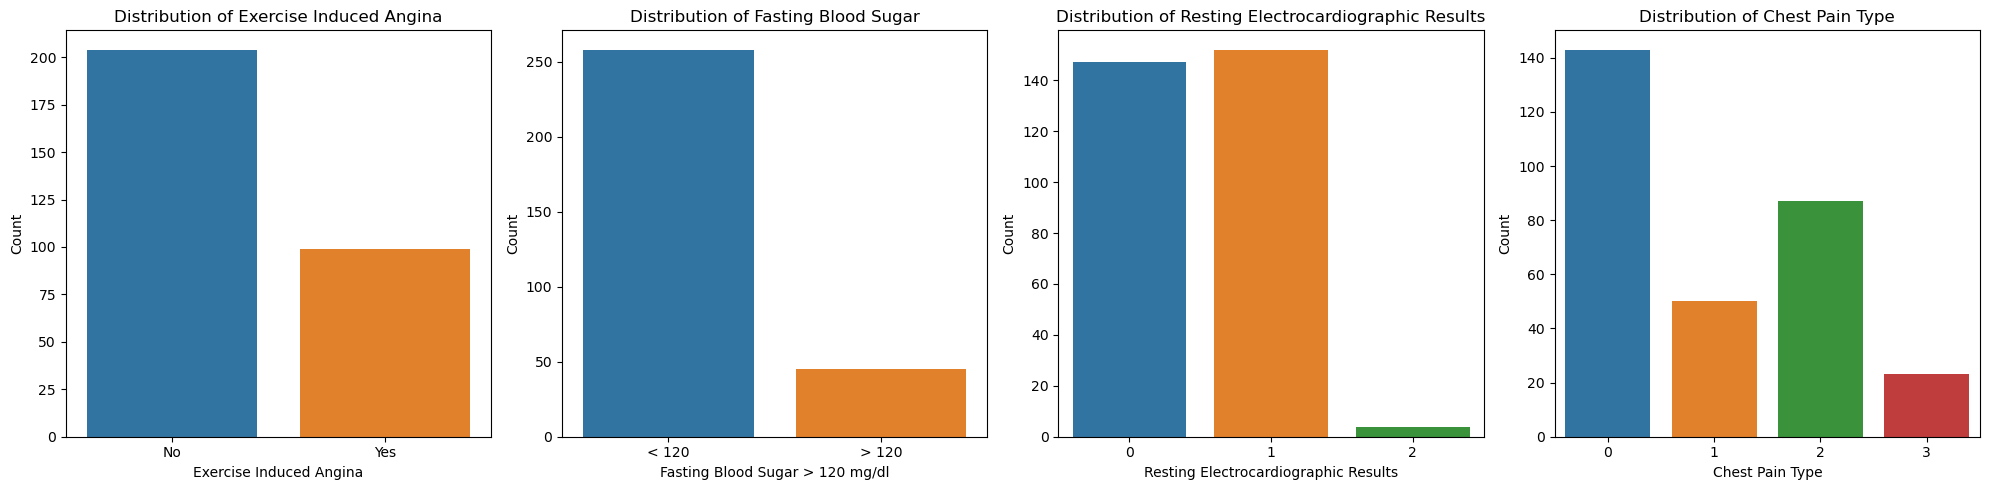

In [11]:
# Create a 1x4 grid for the subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plotting the distribution of Exercise Induced Angina (exang)
sns.countplot(x='exng', data=df, ax=axes[0])
axes[0].set_xlabel('Exercise Induced Angina')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Exercise Induced Angina')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# Plotting the distribution of Fasting Blood Sugar (fbs)
sns.countplot(x='fbs', data=df, ax=axes[1])
axes[1].set_xlabel('Fasting Blood Sugar > 120 mg/dl')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Fasting Blood Sugar')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['< 120', '> 120'])

# Plotting the distribution of Resting Electrocardiographic Results (rest_ecg)
sns.countplot(x='restecg', data=df, ax=axes[2])
axes[2].set_xlabel('Resting Electrocardiographic Results')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Resting Electrocardiographic Results')

# Plotting the chest pain type distribution
sns.countplot(x='cp', data=df, ax=axes[3])
axes[3].set_xlabel('Chest Pain Type')
axes[3].set_ylabel('Count')
axes[3].set_title('Distribution of Chest Pain Type')

plt.tight_layout()
plt.show()

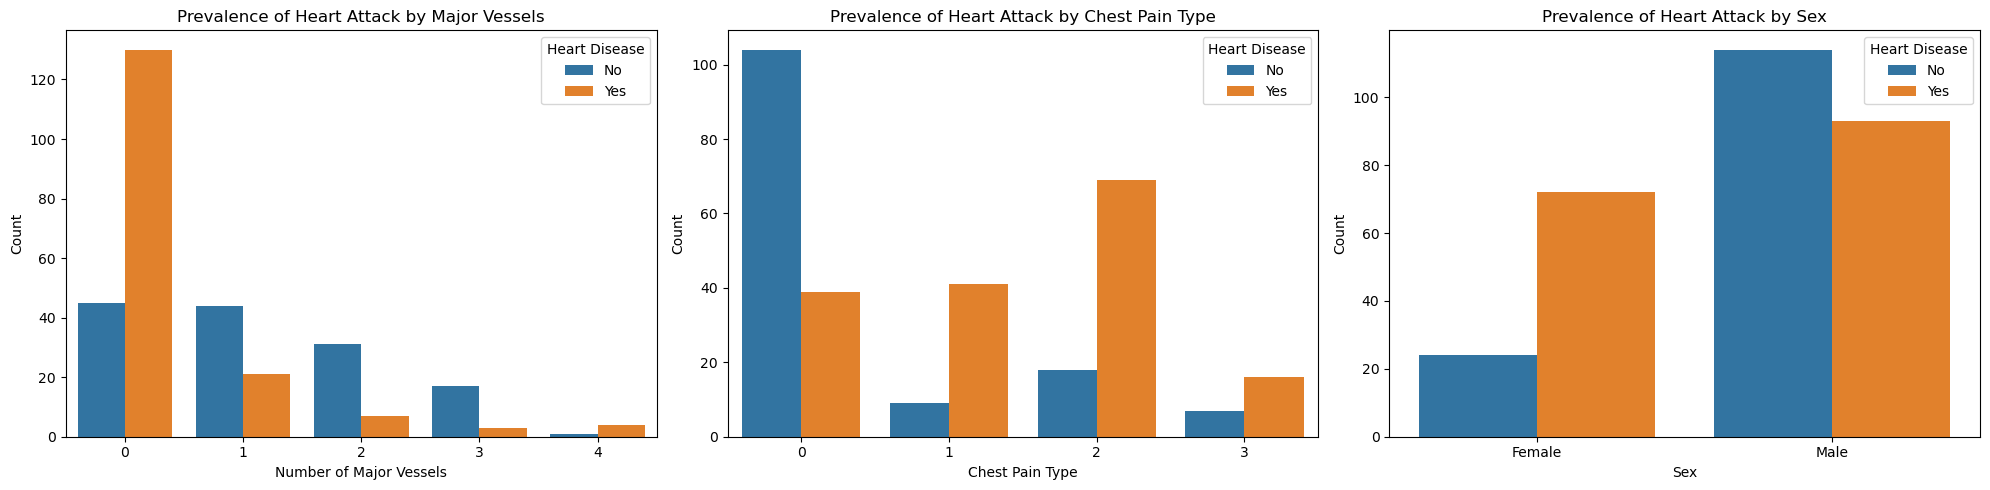

In [12]:
# Create a 1x3 grid for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Prevalence of heart attack by number of major vessels (caa)
sns.countplot(x='caa', hue='output', data=df, ax=axes[0])
axes[0].set_xlabel('Number of Major Vessels')
axes[0].set_ylabel('Count')
axes[0].set_title('Prevalence of Heart Attack by Major Vessels')
axes[0].legend(title='Heart Disease', labels=['No', 'Yes'])

# Prevalence of heart attack by chest pain type (cp)
sns.countplot(x='cp', hue='output', data=df, ax=axes[1])
axes[1].set_xlabel('Chest Pain Type')
axes[1].set_ylabel('Count')
axes[1].set_title('Prevalence of Heart Attack by Chest Pain Type')
axes[1].legend(title='Heart Disease', labels=['No', 'Yes'])

# Prevalence of heart attack by sex
sns.countplot(x='sex', hue='output', data=df, ax=axes[2])
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Count')
axes[2].set_title('Prevalence of Heart Attack by Sex')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Female', 'Male'])
axes[2].legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

# **Exploratory Data Analysis**

## **K Means Clustering**

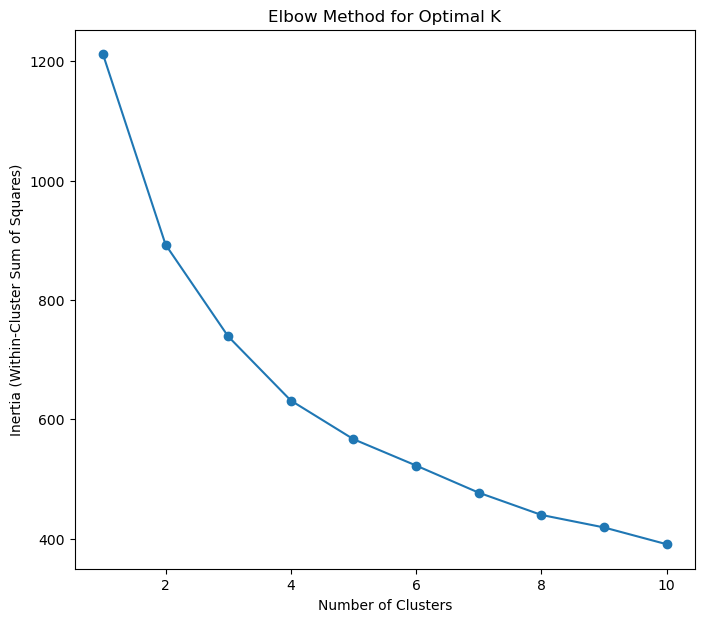

In [13]:
# Selecting the features for clustering
selected_features = ['age', 'thalachh', 'chol', 'trtbps']
X = df[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (Elbow Method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 7))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

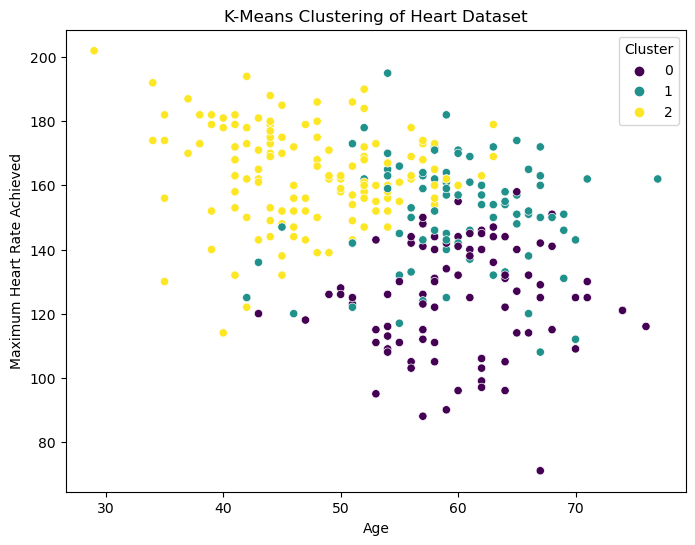

In [14]:
# Based on the Elbow Method, we'll choose the number of clusters as 3
k = 3

# Apply KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the DataFrame
df['Cluster'] = clusters

# Plotting the clusters with respect to the features 'age' and 'thalach'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalachh', hue='Cluster', data=df, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('K-Means Clustering of Heart Dataset')
plt.show()

## **Hierarchial Clustering**

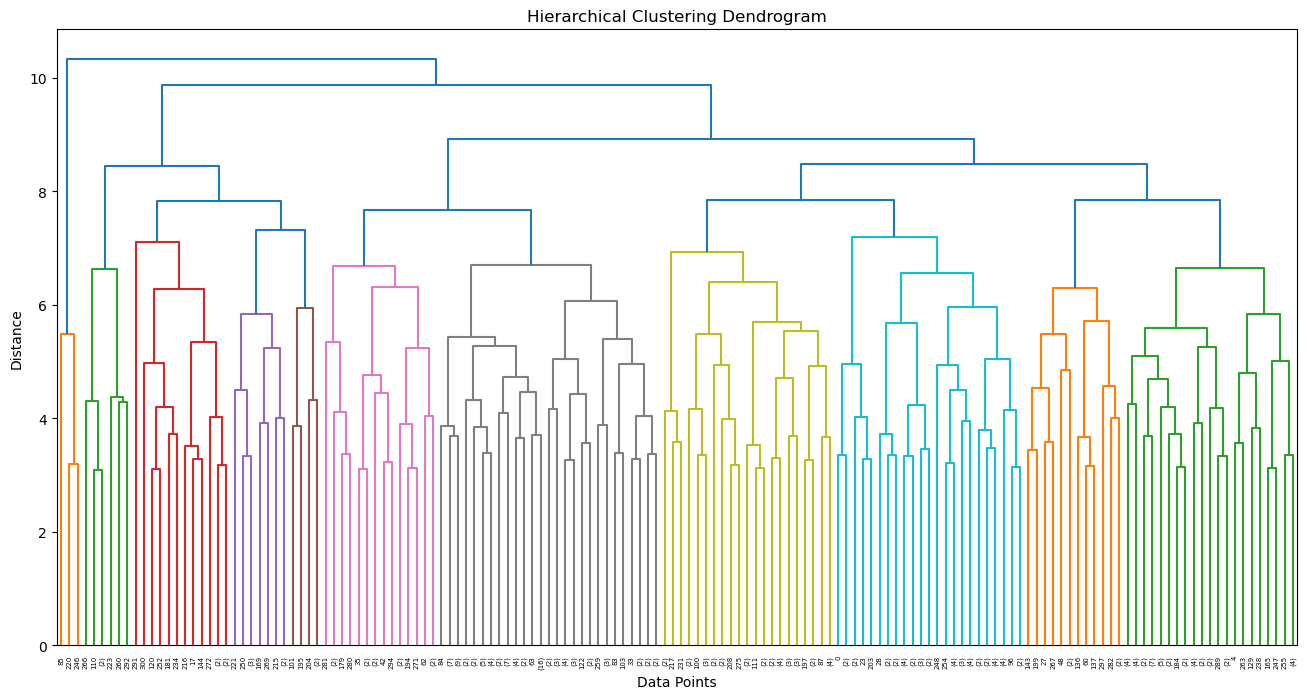

In [15]:
# Drop the 'output' column for clustering
X = df.drop('output', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the linkage matrix using complete linkage method
mergings = linkage(X_scaled, method='complete')

# Plot the dendrogram without labels
plt.figure(figsize=(16, 8))
dendrogram(mergings, leaf_rotation=90, leaf_font_size=5, truncate_mode='lastp', p=150)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

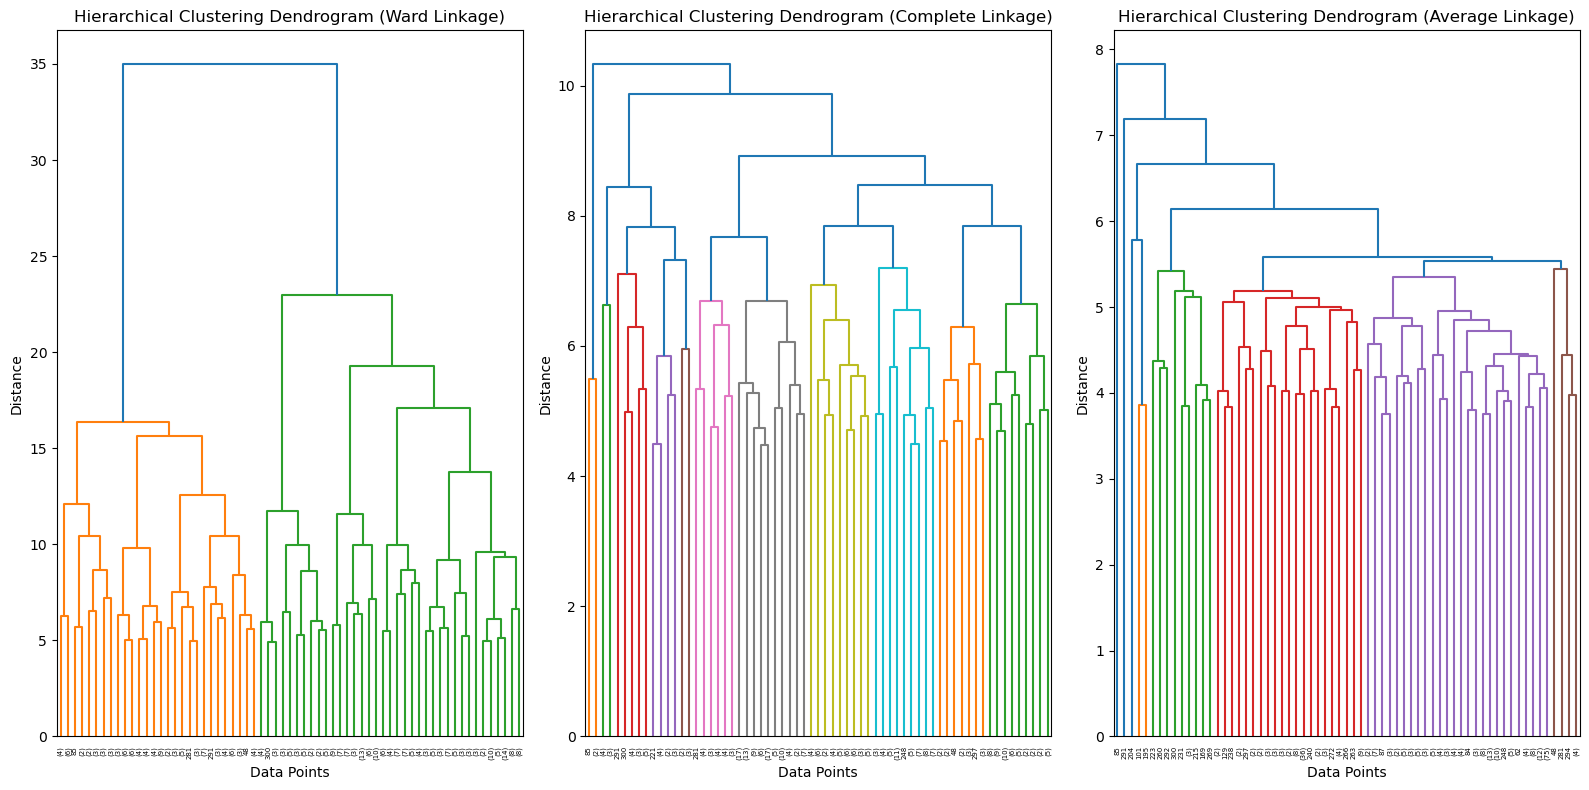

In [16]:
# Drop the 'output' column for clustering
X = df.drop('output', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the linkage matrix using different linkage methods
linkage_methods = ['ward', 'complete', 'average']

plt.figure(figsize=(16, 8))

for i, method in enumerate(linkage_methods, start=1):
    plt.subplot(1, 3, i)
    mergings = linkage(X_scaled, method=method)
    dendrogram(mergings, leaf_rotation=90, leaf_font_size=5, labels=df.index, truncate_mode='lastp', p=65)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')

plt.tight_layout()
plt.show()

# **Classification Algorithms**

Decision Trees,
Random Forests,
K Nearest Neighbors,
Support Vector Classifier,
Logistic Regression,
Naive Bayes (Gaussian)

## **Decision Tree**

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
# Define features and target variable
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['output']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7868852459016393
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



## **Random Forest Classifier**

In [19]:
# Define features and target variable
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['output']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=600)

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [21]:
# Make predictions on the testing data
predictions = rfc.predict(X_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test,predictions))

Accuracy: 0.8032786885245902
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [23]:
print(confusion_matrix(y_test,predictions))

[[23  6]
 [ 6 26]]


## **KNN: K-Nearest Neighbors Classification**

In [24]:
# Define features and target variable
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['output']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Classifier with k=3 (you can choose any value for k)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6065573770491803
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        29
           1       0.62      0.62      0.62        32

    accuracy                           0.61        61
   macro avg       0.61      0.61      0.61        61
weighted avg       0.61      0.61      0.61        61



## **Support Vector Classifier**

In [25]:
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['output']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVC classifier with a radial basis function (RBF) kernel
svc = SVC(kernel='rbf', random_state=42)

# Fit the model on the training data
svc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7049180327868853
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.84      0.75        32

    accuracy                           0.70        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.70      0.70        61



## Best Support Vector Classification Parameters
Based on the Accuracy Score above, we check which kernel performs best with which Regularization parameter 'C'. Then print the classification report.

GOAL: To know if RFB Kernel and default Regularization parameter 'C' gives the best Accuracy with our dataset.

We use GridSearchCV to find the best-performing kernel.

In [26]:
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['output']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100]  # Values of the regularization parameter C to try
}

# Create an SVC classifier
svc = SVC(random_state=42)

# Perform GridSearchCV to find the best kernel and C value
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best kernel and C value from the search
best_kernel = grid_search.best_params_['kernel']
best_C = grid_search.best_params_['C']

print("Best Kernel:", best_kernel)
print("Best C:", best_C)

# Fit the model on the training data using the best parameters
svc_best = SVC(kernel=best_kernel, C=best_C, random_state=42)
svc_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svc_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Kernel: poly
Best C: 100
Accuracy: 0.8852459016393442
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Based on the above results, we can conclude that Support Vector Classifier KERNEL 'poly' with regularization parameter C gives the best accuracy.


## **Logistic regression**

In [27]:
# Define features and target variable
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['output']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8852459016393442
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## **Naive Bayes: Gaussian Model**

In [28]:
# Gausian Naive Bayes
X = df.drop('output', axis=1)
y = df['output']

# Split the dataset into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[26  3]
 [ 5 27]]


Naive Bayes has two models, Gaussian and Multinomial. We chose Gaussian Naive Bayes because it's suitable for **continuous features** that follow a Gaussian (normal) distribution.

Multinomial Naive Bayes is appropriate for **discrete features** representing counts or frequencies, which is inappropriate for our dataset.

The assumptions of the model align with the characteristics of the dataset, leading to better performance and more meaningful results.

# **Regression**

Regression algorithms are:
Linear Regression
Support Vector Regression and KNN Regression

## **Linear Regression**

In [29]:
# Define features and target variable
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['thalachh']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 3.641692310003884e-29
R2 Score: 1.0


## **Support Vector Regression**

In [30]:
# Define features and target variable
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['thalachh']  # We will use 'thalach' as the target variable for SVR

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model
svr = SVR(kernel='rbf')

# Fit the model on the training data
svr.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 281.1478650775191
R2 Score: 0.5459141190082355


## Best Support Vector Regression Parameters
Based on the MSE and R2 Score above, check which kernel performs best with which Regularization parameter 'C' and epsilon. Then print the model evaluation.

In [31]:
# Define features and target variable
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['thalachh']  # We will use 'thalach' as the target variable for SVR

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],  # Values of the regularization parameter C to try
    'epsilon': [0.01, 0.1, 0.2]  # Values of the epsilon parameter for epsilon-SVR
}

# Create an SVR model
svr = SVR()

# Perform GridSearchCV to find the best kernel, C, and epsilon values
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best kernel, C, and epsilon values from the search
best_kernel = grid_search.best_params_['kernel']
best_C = grid_search.best_params_['C']
best_epsilon = grid_search.best_params_['epsilon']

print("Best Kernel:", best_kernel)
print("Best C:", best_C)
print("Best Epsilon:", best_epsilon)

# Fit the model on the training data using the best parameters
svr_best = SVR(kernel=best_kernel, C=best_C, epsilon=best_epsilon)
svr_best.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = svr_best.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Best Kernel: linear
Best C: 100
Best Epsilon: 0.01
Mean Squared Error: 2.4163718720112287e-05
R2 Score: 0.9999999609728372


Based on the above results, we know Linear Kernel performs better for our regression model

## **KNN: K-Nearest Neighbors Regression**

In [32]:
# Define features and the target variable
features = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['thalachh']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regression model
knn_reg = KNeighborsRegressor()

# Define a range of values for the number of neighbors (k)
param_grid = {'n_neighbors': range(1, 21)}  # Test k values from 1 to 20

# Perform GridSearchCV to find the optimal number of neighbors using cross-validation
grid_search = GridSearchCV(knn_reg, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best k value from the grid search
best_k = grid_search.best_params_['n_neighbors']

# Create a KNN Regression model with the best k value
knn_reg_best = KNeighborsRegressor(n_neighbors=best_k)

# Fit the model on the training data with the best k value
knn_reg_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_reg_best.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best K:", best_k)
print("Mean Squared Error (KNN Regression):", mse)
print("R2 Score (KNN Regression):", r2)


Best K: 3
Mean Squared Error (KNN Regression): 8.734061930783241
R2 Score (KNN Regression): 0.9858934934277989


In KNN (K-Nearest Neighbors) Regression, the choice of the number of neighbors (k) is a crucial hyperparameter that can significantly impact the performance of the model. A smaller value of k might lead to overfitting, while a larger value of k might lead to underfitting. Therefore, finding the optimal value of k is essential to ensure the best possible performance of the KNN Regression model.

We used GridSearchCV with cross-validation to find the optimal k.

Cross-validation evaluates the model's performance for each k value. It divides the training data into multiple folds and performs training and testing on different combinations of these folds. This helps to obtain a more reliable estimate of the model's performance and reduces the risk of overfitting to a specific training-test split

# Recursive feature elimination with cross-validation.
GOAL: To find the number of optimal features from our dataset.

In [33]:
df = pd.read_csv('heart.csv') # re-import the original data
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
X = df.drop(columns=['output'])  # Drop the 'output' column to get the features
y = df['output']

In [35]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [36]:
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')

In [37]:
rfecv = RFECV(estimator=logistic_regression, step=1, cv=StratifiedKFold(10), scoring='accuracy')

In [38]:
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

In [39]:
# Get the selected features
selected_features = X.columns[rfecv.support_]

In [40]:
# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['sex', 'cp', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa',
       'thall'],
      dtype='object')


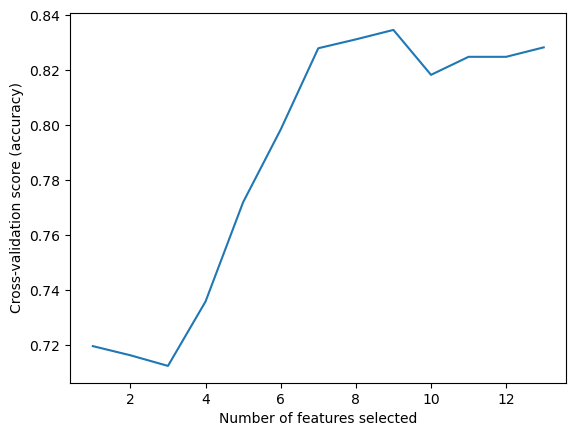

Optimal number of features: 9
Feature ranking: [4 1 1 2 5 3 1 1 1 1 1 1 1]
Cross-validation scores: [0.71967742 0.71634409 0.71247312 0.73591398 0.77204301 0.79849462
 0.82806452 0.83129032 0.83473118 0.8183871  0.82494624 0.82494624
 0.8283871 ]


In [41]:
# Plot the number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Find the optimal number of features
optimal_num_features = rfecv.n_features_
feature_ranking = rfecv.ranking_
print("Optimal number of features:", optimal_num_features)
print("Feature ranking:", feature_ranking)
# Accessing the cross-validation results using 'cv_results_'.  "grid_scores_ depreciated"
cv_results = rfecv.cv_results_
grid_scores_ = cv_results['mean_test_score']
print("Cross-validation scores:", grid_scores_)

After RFECV is applied, the ranking of features is obtained based on the order in which they were eliminated during the recursive feature elimination process. The smaller the ranking value for a feature, the more important the feature is considered by the RFECV algorithm. Features with a ranking of 1 are considered the most important, and those with higher rankings are considered less important or less relevant to the model's performance.

Feature Ranking was added to give insight into which features are important

## Optimal Feature Selection

In [42]:
# Create a new DataFrame with the optimal features
optimal_features_df = df[selected_features]

# Call info() method on the new DataFrame
print("Info of the new DataFrame:")
optimal_features_df.info()

# Call describe() method on the new DataFrame
print("\nDescription of the new DataFrame:")
print(optimal_features_df.describe())

Info of the new DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   restecg   303 non-null    int64  
 3   thalachh  303 non-null    int64  
 4   exng      303 non-null    int64  
 5   oldpeak   303 non-null    float64
 6   slp       303 non-null    int64  
 7   caa       303 non-null    int64  
 8   thall     303 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 21.4 KB

Description of the new DataFrame:
              sex          cp     restecg    thalachh        exng     oldpeak  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.683168    0.966997    0.528053  149.646865    0.326733    1.039604   
std      0.466011    1.032052    0.525860   22.905161    0.469794    1.161075   
min      0.000000    0.000000 

## Applying PCA on the optimal features

First, we inspect the contribution of each component and understand how much variance is retained when considering different numbers of principal components

In [43]:
# Standardize the features (PCA is sensitive to feature scales)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA with all components initially. Note:(n_components=None)
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_std)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a DataFrame to display the results
variance_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio,
                            'Cumulative Explained Variance': cumulative_explained_variance})


print(variance_df)

    Explained Variance Ratio  Cumulative Explained Variance
0                   0.212541                       0.212541
1                   0.118207                       0.330748
2                   0.094064                       0.424812
3                   0.090857                       0.515669
4                   0.078613                       0.594282
5                   0.074617                       0.668899
6                   0.066367                       0.735265
7                   0.059688                       0.794954
8                   0.055302                       0.850256
9                   0.047813                       0.898069
10                  0.040777                       0.938846
11                  0.032549                       0.971395
12                  0.028605                       1.000000


The goal is often to select the appropriate number of principal components that collectively explain a high proportion of the total variance.
* Principal components with high Explained Variance Ratios preserve most of the important patterns and structures of the original data.

* Principal components with low Explained Variance Ratios may not capture as much of the data's variability. Including such components in the reduced dimensional space might lead to loss of important information and potentially result in a less accurate representation of the data.

In [44]:
# 'optimal_features_df' is  DataFrame with the optimal features obtained from RFECV
# Initialize the PCA object with the desired number of components (dimensionality)
n_components = 3  # Replace with the number of components you want
pca = PCA(n_components=n_components)

# Fit PCA on the optimal features data
pca.fit(optimal_features_df)

# Transform the data to the reduced dimensionality
reduced_data = pca.transform(optimal_features_df)

# Create a new DataFrame with the reduced dimension data
columns = [f"PC{i+1}" for i in range(n_components)]
reduced_df = pd.DataFrame(data=reduced_data, columns=columns)

# Call info() method on the new DataFrame
print("Info of the reduced dimension DataFrame:")
reduced_df.info()

# Call describe() method on the new DataFrame
print("\nDescription of the reduced dimension DataFrame:")
print(reduced_df.describe())


Info of the reduced dimension DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     303 non-null    float64
 1   PC2     303 non-null    float64
 2   PC3     303 non-null    float64
dtypes: float64(3)
memory usage: 7.2 KB

Description of the reduced dimension DataFrame:
                PC1           PC2           PC3
count  3.030000e+02  3.030000e+02  3.030000e+02
mean   1.425776e-14 -3.752041e-16  3.517538e-17
std    2.291377e+01  1.200407e+00  1.016559e+00
min   -5.236780e+01 -3.093513e+00 -2.609674e+00
25%   -1.635426e+01 -8.604536e-01 -7.209356e-01
50%   -3.353987e+00 -1.704308e-01 -7.960669e-02
75%    1.612256e+01  6.149987e-01  6.175574e-01
max    7.862312e+01  5.632314e+00  3.554899e+00


GOAL: The above code gives us a sample view/ understanding of how PCA works with 3 selected components

In [45]:
# 'optimal_features_df' is DataFrame with the optimal features obtained from RFECV

# Print the dimensions of the original dataset
print("Dimensions of the original dataset:")
print(X.shape)

print("\nDimensions of the Optimal dataset:")
print(optimal_features_df.shape)

# Transform the data to the reduced dimensionality
reduced_data = pca.transform(optimal_features_df)

# Create a new DataFrame with the reduced dimension data
columns = [f"PC{i+1}" for i in range(n_components)]
reduced_df = pd.DataFrame(data=reduced_data, columns=columns)

# Print the dimensions of the reduced dimension dataset
print("\nDimensions of the reduced dimension dataset:")
print(reduced_df.shape)


Dimensions of the original dataset:
(303, 13)

Dimensions of the Optimal dataset:
(303, 9)

Dimensions of the reduced dimension dataset:
(303, 3)


## Classification Algorithms Comparision on Orginal and Reduced data
Apply all learned classification algorithms to choose which one performs best

In [46]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training multiple classification models on the original data
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    SVC(kernel='poly', C=100, random_state=42), #This kernel and C performed better.
    LogisticRegression(random_state=42),
    GaussianNB(),
]

print("Performance on the original data:")
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy:.3f}")
    print(classification_report(y_test, y_pred))

print("*" * 60)
# Evaluating the models on the reduced dimension data obtained through PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(reduced_df, y, test_size=0.2, random_state=42)

print("\nPerformance on the reduced dimension data (PCA):")
for model in models:
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
    print(f"Model: {model.__class__.__name__}, Accuracy (PCA): {accuracy_pca:.3f}")
    print(classification_report(y_test_pca, y_pred_pca))


Performance on the original data:
Model: DecisionTreeClassifier, Accuracy: 0.754
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

Model: RandomForestClassifier, Accuracy: 0.836
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Model: KNeighborsClassifier, Accuracy: 0.689
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accur

In [47]:
results = []  # Store model names and accuracies

for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy (Original Data)': accuracy})


for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
    for result in results:
        if result['Model'] == model_name:
            result['Accuracy (Reduced Dimension)'] = accuracy_pca

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the comparison table
print(results_df)

                    Model  Accuracy (Original Data)  \
0  DecisionTreeClassifier                  0.754098   
1  RandomForestClassifier                  0.836066   
2    KNeighborsClassifier                  0.688525   
3                     SVC                  0.836066   
4      LogisticRegression                  0.885246   
5              GaussianNB                  0.868852   

   Accuracy (Reduced Dimension)  
0                      0.754098  
1                      0.786885  
2                      0.754098  
3                      0.770492  
4                      0.868852  
5                      0.852459  


In [48]:
# Determine which data performed better for each model
best_data = results_df.groupby('Model')['Accuracy (Original Data)'].idxmax()
best_data_performed = results_df.loc[best_data, ['Model', 'Accuracy (Original Data)', 'Accuracy (Reduced Dimension)']]
print("\nBest Performing Data for Each Model:")
print(best_data_performed)


Best Performing Data for Each Model:
                    Model  Accuracy (Original Data)  \
0  DecisionTreeClassifier                  0.754098   
5              GaussianNB                  0.868852   
2    KNeighborsClassifier                  0.688525   
4      LogisticRegression                  0.885246   
1  RandomForestClassifier                  0.836066   
3                     SVC                  0.836066   

   Accuracy (Reduced Dimension)  
0                      0.754098  
5                      0.852459  
2                      0.754098  
4                      0.868852  
1                      0.786885  
3                      0.770492  


GOAL: Provide a side-by-side comparison of the model's performance on the two datasets—the Original and Reduced Data accuracy scores.

The best model is selected based on the difference in accuracy between the Original data and the Reduced data.
Based on the results, the Decision Tree Classifier with an accuracy of 0.754098 performs better as there is no difference in accuracy whether the data is original or reduced.


## Regression Algorithms Comparision on Orginal and Reduced data
Apply all learned regression algorithms to choose which one performs best

In [49]:
# Prepare the features and target
df = pd.read_csv('heart.csv') # get orignal for good measure
X = df.drop(columns=['output'])  # Drop the 'output' column to get the features
y = df['output']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Initialize PCA with the desired number of components (dimensionality)
n_components = 4  # Our choice of number of components
pca = PCA(n_components=n_components)

# Apply PCA on the scaled features data
reduced_data = pca.fit_transform(X_scaled)

# Create a new DataFrame with the reduced dimension data
columns = [f"PC{i+1}" for i in range(n_components)]
reduced_df = pd.DataFrame(data=reduced_data, columns=columns)

# Print the dimensions of the reduced dimension dataset
print("Dimensions of the reduced dimension dataset:")
print(reduced_df.shape)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(reduced_df, y, test_size=0.2, random_state=42)

# Standardize the features for regression models
scaler_regression = StandardScaler()
X_train_scaled = scaler_regression.fit_transform(X_train)
X_test_scaled = scaler_regression.transform(X_test)
X_train_pca_scaled = scaler_regression.fit_transform(X_train_pca)
X_test_pca_scaled = scaler_regression.transform(X_test_pca)

# Initializing and training multiple regression models on the original data
models = [
    LinearRegression(),
    SVR(kernel='linear', C=100, epsilon=0.01),  # Paramaters based on GridSearchCV
    KNeighborsRegressor(n_neighbors=3)
]

results = []  # Store model names and metrics

print("Performance on the original data:")
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Data': 'Original Data',
        'Mean Squared Error': mse,
        'R2 Score': r2
    })

    print(f"Model: {model_name}, Mean Squared Error: {mse:.3f}, R2 Score: {r2:.3f}")

print("*" * 60)

# Evaluating the models on the reduced dimension data obtained through PCA
print("\nPerformance on the reduced dimension data (PCA):")
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_pca_scaled, y_train_pca)
    y_pred_pca = model.predict(X_test_pca_scaled)
    mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
    r2_pca = r2_score(y_test_pca, y_pred_pca)

    results.append({
        'Model': model_name,
        'Data': 'Reduced Dimension (PCA)',
        'Mean Squared Error': mse_pca,
        'R2 Score': r2_pca
    })

    print(f"Model: {model_name}, Mean Squared Error (PCA): {mse_pca:.3f}, R2 Score (PCA): {r2_pca:.3f}")

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the comparison table
print("\nComparison Table:")
print(results_df)

# Determine which data performed better for each model
best_data = results_df.groupby('Model')['R2 Score'].idxmax()
best_data_performed = results_df.loc[best_data, ['Model', 'Data']]
print("\nBest Performing Data for Each Model:")
print(best_data_performed)


Dimensions of the reduced dimension dataset:
(303, 4)
Performance on the original data:
Model: LinearRegression, Mean Squared Error: 0.116, R2 Score: 0.534
Model: SVR, Mean Squared Error: 0.137, R2 Score: 0.450
Model: KNeighborsRegressor, Mean Squared Error: 0.126, R2 Score: 0.496
************************************************************

Performance on the reduced dimension data (PCA):
Model: LinearRegression, Mean Squared Error (PCA): 0.115, R2 Score (PCA): 0.540
Model: SVR, Mean Squared Error (PCA): 0.110, R2 Score (PCA): 0.558
Model: KNeighborsRegressor, Mean Squared Error (PCA): 0.137, R2 Score (PCA): 0.452

Comparison Table:
                 Model                     Data  Mean Squared Error  R2 Score
0     LinearRegression            Original Data            0.116271  0.533789
1                  SVR            Original Data            0.137116  0.450206
2  KNeighborsRegressor            Original Data            0.125683  0.496049
3     LinearRegression  Reduced Dimension (PCA

MSE is used to check how close estimates or forecasts are to actual values.
* Lower the MSE, the closer is forecast to actual.
* The lower value indicates a better fit

After evaluating our model, based on the number of PCA components we've selected which is 4, Both LinearRegression and SVR models performed better on the reduced dataset and KNN Regression better on the orginal dataset.

# **Conclusion**
- Discuss findings for classification algorithms and regression (before PCA)
- Discuss findings for classification algorithms and regression (after PCA)
- Comparing the Models (Which Is Better?)
- Our approach and what we learned from this project

## **Findings for classification algorithms and regression (Before PCA)**

**Decision Tree**

One of our classification algorithms that we used to assess data based off of the most significant attributes at each node was Decision Tree. We used this to assess whether a patient is at risk of heart attack occurrence based on age, sex, chest pain type, maximum heart rate achieved, exercise induced angina, oldpeak, slope of peak exercise, and the number of major vessels. Accuracy was evaluated and was determined to be 0.78688 which is 78.69%. This means that 78.69% of the samples were correctly classified. Furthermore, when analyzing the classification report the precision for 0 (no heart attack) is 0.75 and for 1 (heart attack) is 0.83. The call is 0.83 for 0 and 0.75 for 1. The f1 score is 0.79 for 0 and the same for 1. And 29 for 0 and 32 for 1 for support. There were 29 instances of class 0 and 32 instances of class 1. This shows that the model’s performance is balanced and precision and recall is similar for both classes.

**Random Forest Classifier**

Random forest classifier is used for making multiple decision trees further bettering predictive accuracy and overfitting reduction. Each tree in the forest is made using a random subset of the training data and a random subset of features. In the classification report, there was an accuracy of 85.25% showing the percentage of correctly classified instances. Precision for class 1 was 84% and 87% for class 0. F1 score was 86.12%. Furthermore, the confusion matrix demonstrated the model's performance. Out of 61 samples, 24 were correctly sampled as class 0 (no heart attack) and 28 were correctly classified as class 1 (heart attack). However, the model misclassified 5 instances of no heart attack as heart attack and 4 instances of heart attack as no heart attack. Overall, this algorithm did a very good job in classifying heart attack risk.

**K Nearest Neighbours**

K Nearest Neighbours operates on the principle of finding the k nearest data points in the training set and classification data points on the majority class of its k nearest neighbors. In this case we used k = 3 as the parameter. The classification report shows class 0 as 59% and class 1 as 62%. Recall was 59% for class 0 and 62% for class 1. The F1 score was the same as recall. Accuracy is 60.66% meaning these many were correctly classified by the KNN model. The moderate performance was slightly better than random guessing, however needs further refinements to capture relevant patterns in data.

**Support Vector Classifier**

This algorithm is based on finding the optimal hyperplane that best separates different classes in feature space. The RBF kernel is a variant of the algorithm allowing for more flexibility and nonlinearity. The precision for class 0 is 0.76 and for class 1 0.68. Recall was 0.55 for class 0 and 0.84 for class 1. F1 score was 0.64 for class 0 and 0.75 for class 1. Support was 29 instances of class 0 and 32 instances of class 1. Accuracy was 70.49% meaning these many samples were correctly classified. While the accuracy is quite moderate, the precision for class 1 is relatively lower than class 0. This suggests a higher chance of false positives for heart attack class. We knew we needed to make further refinements.

It is important we were choosing the best kernel for the c parameter so after trying rbf with default c parameter we noticed we were not getting the best results. We used gridsearchcv to find the best kernel. We got the best kernel as poly and best c parameter as 100 with an improved accuracy of 0.88.

**Logistic Regression**

This algorithm is usually used for binary classification tasks and uses sigmoid function to map output to probabilities between 0 and 1. The precision for class 0 is 0.76 and for class 1 is 0.68. The recall was 0.55 for class 0 and for class 1 is 0.84. The f1 score for class 0 was 0.75 and support was 29 instances of class 0 and 32 instances of class 1. The accuracy was 70.49% which is fairly moderate.

**Linear Regression and Support Vector Regression**

Both perform exceptionally well achieving extremely low mean squared error (MSE) and high R2 Score values, indicating high accuracy for predicting target variable “thalachh”. Both models portray excellent predictive performance, with both MSE values being very close to zero and R2s scores close to 1.0.


## **Findings for classification algorithms and regression (After PCA)**

Principal Component Analysis (PCA) is used to reduce the number of features in a dataset while preserving as much variance as possible. In a dataset like this one, there can be increased computational issues, more risk of overfitting and difficulties in visualization. PCA captures a significant portion of dataset variance while reducing dimensionality.

**Decision Tree Classifier** remained consistent with a slight decrease from 0.745 to 0.750 after PCA. F1 scores also showed the same pattern, indicating not much changed after dimensionality reduction

**RandomForestClassifier** slightly decreased from 0.836 to 0.787 after PCA. Precision, recall and F1 scores for both classes remained similar suggesting model performance was able to handle reduced data well.

**KNeighbors Classifier** remained the exact same and precision, recall and F1 scores remained similar.

**SVC** slightly decreased from 0.836 to 0.754 after PCA. Logistic regression remained the highest at 0.869 after pca.


## **Comparing the Models: Which is Better?**

Ranking based on Accuracy (Original Data):

1. Logistic Regression - Accuracy: 0.885
2. RandomForestClassifier - Accuracy: 0.836
3. SVC - Accuracy: 0.836
4. DecisionTreeClassifier - Accuracy: 0.754
5. KNeighborsClassifier - Accuracy: 0.689

Ranking based on Accuracy (Reduced Dimension - PCA):

1. Logistic Regression - Accuracy (PCA): 0.869
2. RandomForestClassifier - Accuracy (PCA): 0.787
3. SVC - Accuracy (PCA): 0.770
4. DecisionTreeClassifier - Accuracy (PCA): 0.754
5. KNeighborsClassifier - Accuracy (PCA): 0.754

Logistic Regression was the top classification algorithm with the best accuracy performing at 85% at excellent precision, recall and F1 scores for both classes. RandomForestClassifier and SVC were both second, with RandomForestClassifier's abiliy to handle nonlinear relationships and feature interactions and Support Vector Classifications flexibility with different kernel functions. DecisionTreeClassifier demonstated decent predictive performance, however may be prone to overfitting as its slighty lower recall for class 1 compared to class 0. KNeighborsClassifier had lowest accuracy, and relies heavily on neighbourhood information. Its performance may improve slightly with optimized parameter settings.

After applying PCA and dimensionality reduction logistic regression remained with the highest accuracy, precision, recall and F1 scores. RandomForestClassifier came in second, showing its ability to handle dimensionality reduction. SVC came in third, with its recall for class 0 slightly decreasing. and DecisionTree and KNeighbors both achieved an accuracy of 0.754.

In conclusion Logistic Regression, RandomForestClassifier and SVC are the top performing algorithms predicting heart disease presence.

## **Key Takeways from this Project**

In this project for CCPS844 - Data Mining. We learned how to apply all the concepts we learned in lecture such as machine learning algorithms for classifying and predicting heart disease based on our Kaggle Heart Attack Prediction Dataset. Our objective was to build models that were accurate and could potentially be used to diagnose and prevent heart attacks in early stages.


Our approach was to first process our data, where we handled missing values and encoded categorical variables. We than applied feature selection such as featues that played a critical role in determining our objective goals so that we would avoid overfitting and enhance our performance for the machine learning algorithms

Than we applied all classification and regression algorithms such as Decision Tree, Random Forest, K Nearest Neighbors, Support Vector Classifier (SVC), logistic Regression, Support Vector Regression (SVR), and Linear Regression.

In order to evaluate our models we used metrics such as accuracy, precision, recall, and F1 score and visualized results through classifiaction reports and confusion matrices.

In order to further enhance our models we applied Principal Component Analysis (PCA) to reduce data dimensionality and see how the models would perform on transformed data.

For the project we used GridSearchCV which is a powerful technique for hyperparameter tuning that exhaustively searches through a specified hyperparameter space to find the best combination of hyperparameters for a given model.

We learned which algorithm models performed the best, and thus learned alot about the different models and they're benefits. By directly applying each of the models we could assess their performance and gain knowledge and understanding on how they work and which ones work the best.

By doing this we can have accurate prediction, Data-driven decision making, efficient diagnosis, potential for personalized medicine, and insights into risk factors

## **References**

***Classification Algorithms:***

Decision Tree Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

K-Nearest Neighbors (KNN) Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Support Vector Classifier (SVC): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

***Regression Algorithms:***

Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Support Vector Regression (SVR): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

***Overfitting and Underfitting:***

Overfitting and Underfitting in scikit-learn: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

***PCA (Principal Component Analysis):***

PCA in scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

***Feature Selection:***

Feature Selection in scikit-learn: https://scikit-learn.org/stable/modules/feature_selection.html

***Visualization using matplotlib:***

Matplotlib Official Website: https://matplotlib.org/
Matplotlib is a widely used plotting library in Python. You can create various types of visualizations, including line plots, scatter plots, bar charts, histograms, and more.

***Visualization using seaborn:***

Seaborn Official Website: https://seaborn.pydata.org/
Seaborn is a data visualization library based on matplotlib. It provides a high-level interface for creating attractive statistical graphics.

***Visualization using pandas:***

Pandas Visualization: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
Pandas, a powerful data manipulation library, also offers basic data visualization capabilities that are integrated with its DataFrame structure.